***We will be building a multiclass classification neural network to identify hand wriiten digits bwtween 0 to 1. For this we will be using a dataset called 'MNIST'.***

***There will be 10 classes: Digits from 0 to 9.***

MNIST is a large dataset with 70000 digits. Out of which 60000 are training set example and 10000 are test set example.

In [35]:
# To ignore all the warnings

import warnings
warnings.filterwarnings("ignore")

In [36]:
# Import all the libraries

import numpy as np
import pandas as pd

import tensorflow as tf
import keras

import matplotlib.pyplot as plt

In [37]:
# check tf and keras version

print("TensorFlow version is:", tf.__version__)
print("Keras version is:", keras.__version__)

TensorFlow version is: 2.15.0
Keras version is: 2.15.0


In [38]:
# loading the dataset
# As keras has MNIST dataset inbuilt we dont have to import data from external csv file

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [39]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [40]:
# Let's see how a single image looks like

X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

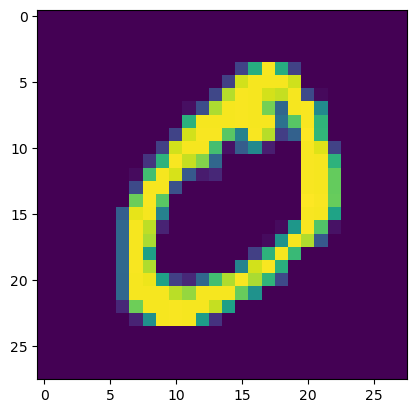

In [41]:
plt.imshow(X_train[1])
# imshow denotes imagehsow

In [42]:
y_train[1]

0

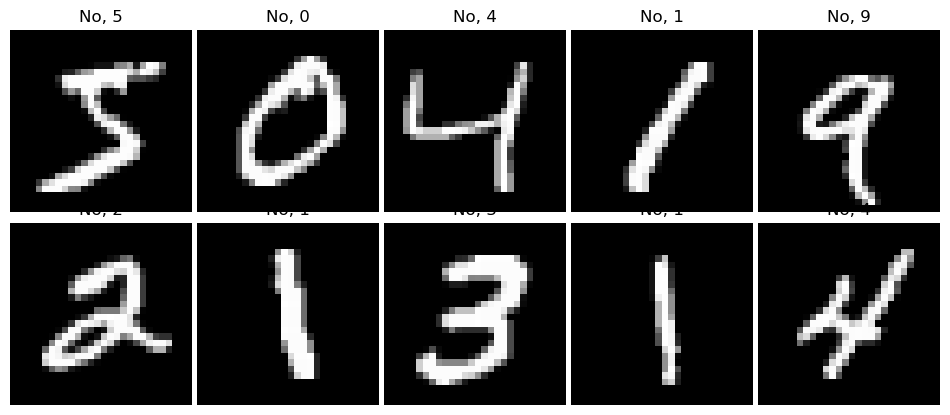

In [43]:
# code to view all the images

num_rows, num_cols = 2,5
f, ax = plt.subplots(num_rows, num_cols, figsize =(12,5), 
                     gridspec_kw = {"wspace": 0.03, "hspace": 0.01}, squeeze = True )

for r in range(num_rows):
    for c in range(num_cols):
        image_index = r * 5 +c
        ax[r,c].axis("off")
        ax[r,c].imshow(X_train[image_index], cmap="gray")
        ax[r,c].set_title("No, %d" % y_train[image_index])
        
plt.show()
plt.close()
        

In [44]:
# Check the shape before reshaping
print("Before reshaping:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# Reshape the training data
X_train = X_train.reshape(X_train.shape[0], -1)

# Reshape the testing data
X_test = X_test.reshape(X_test.shape[0], -1)

# Check the shape after reshaping
print("After reshaping:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

Before reshaping:
X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
After reshaping:
X_train shape: (60000, 784)
X_test shape: (10000, 784)


***NORMALIZE THE DATA***

The pixel value ranges from 0 to 255

We will normalize the value using min-max scaler

Formula is: x = (X-X_min)/(X_max-X_min) = X/255

In [45]:
# Normalizing the data within range of 0 to 1 using min-max scaler

X_train = X_train/255
X_test = X_test/255

In [46]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [48]:
# class labesl
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

***Building a multiclass classification neural network*** 

1. Defining a neural network.
2. Compiling a neural network.
3. Training a neural network.
4. Evaluating a neural network.
5. Predicting a neural network.

***Our Model Architecture***

The architecture is build considering 2 important aspects

1. No. of layers that needs to be created.
2. No of neurons in each layer

For our layer we will be considering the following aspects:

1. input = no. of features in input layer = 784
2. No. of neurons in first dense layer = 512
3. No. of neurons in second dense layer = 128
4. No. of neurons in output layer = 10

***SOFTMAX ACTIVATION***

Here at the output layer we have 10 classes ranging from 0 to 9. We will be using softmax activation at every output neuron.

Softmax activation is a popular activation function used in the output layer of a neural network for multi-class classification problems. It is particularly useful when the task involves assigning an input data point to one of three or more classes.

The softmax function takes a vector of real numbers as input and transforms them into a probability distribution. It squashes the values in the input vector to be between 0 and 1 and normalizes them such that the sum of the probabilities is equal to 1. Softmax is typically used in the output layer of a neural network when the goal is to classify data into multiple classes. It converts raw output scores into probabilities.
The class having the maximum probability is then selected as the genuine class.


In [49]:
# importing required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# Defining the model
model = Sequential()

# Adding input layers
input_dims = X_train.shape[1]
output_dims = 10
model.add(tf.keras.Input(shape =(input_dims), name = "input_layer"))

# Adding hidden layers
model.add(Dense(512, activation = "sigmoid", name = "hidden_layer1"))
model.add(Dense(128, activation = "sigmoid", name = "hidden_layer2"))

# Adding output layer
model.add(Dense(10, activation = "softmax", name = "output_layer"))

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 512)               401920    
                                                                 
 hidden_layer2 (Dense)       (None, 128)               65664     
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 468874 (1.79 MB)
Trainable params: 468874 (1.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


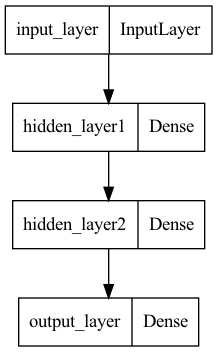

In [51]:
# Plotting the Model
from tensorflow.keras.utils import plot_model
plot_model(model)

***One Hot Encoding***

For multi-class classification tasks, the labels should be one-hot encoded, meaning each sample should have a binary array where only one element is 1 (indicating the class) and the rest are 0s. It seems like your labels (y_train and y_test) are not in the correct format.

You can use one-hot encoding to transform your labels into the appropriate format using tools like to_categorical from Keras or OneHotEncoder from scikit-learn.

In [ ]:
from keras.utils import to_categorical

# Assuming y_train and y_test are your original labels

# One-hot encode the training labels
y_train_encoded = to_categorical(y_train, num_classes=10)

# One-hot encode the test labels
y_test_encoded = to_categorical(y_test, num_classes=1

***Compile the Neural Network***

In [66]:
#import optimizer
from tensorflow.keras.optimizers import RMSprop

# define the optimizer
optimizer = RMSprop(0.001) #setting the learning rate at 0.001

#compile the model
model.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics = ["accuracy"])

***Binary_Crossentopy***

Binary Crossentropy, often referred to as log loss or logistic loss, is a loss function commonly used in binary classification problems. It measures the difference between the true labels and the predicted probabilities for a binary classification task. Binary Crossentropy is a commonly used loss function for binary classification tasks, measuring the discrepancy between predicted probabilities and true labels. 

***accuracy metrics***

Accuracy is a commonly used metric for evaluating classification models. It measures the overall correctness of predictions by comparing the number of correct predictions to the total number of predictions.

***Training the Neural Network***

In [67]:
batch_size = 128
num_epochs = 20

multiclass_classifier = model.fit(X_train, y_train_encoded, validation_split=0.2, epochs=num_epochs,
                                  batch_size = batch_size, verbose =1)

# batch_size should be in 2^n form, where n= 1,2,3....

Epoch 1/20
375/375 [==============================] - 3s 7ms/step - loss: 0.2221 - accuracy: 0.6207 - val_loss: 0.1245 - val_accuracy: 0.8374
Epoch 2/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0993 - accuracy: 0.8678 - val_loss: 0.0774 - val_accuracy: 0.8926
Epoch 3/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0728 - accuracy: 0.8942 - val_loss: 0.0625 - val_accuracy: 0.9060
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0621 - accuracy: 0.9047 - val_loss: 0.0553 - val_accuracy: 0.9141
Epoch 5/20
375/375 [==============================] - 3s 8ms/step - loss: 0.0558 - accuracy: 0.9133 - val_loss: 0.0506 - val_accuracy: 0.9224
Epoch 6/20
375/375 [==============================] - 3s 7ms/step - loss: 0.0514 - accuracy: 0.9185 - val_loss: 0.0466 - val_accuracy: 0.9270
Epoch 7/20
375/375 [==============================] - 3s 7ms/step - loss: 0.0479 - accuracy: 0.9247 - val_loss: 0.0447 - val_accuracy: 0.9306
Epoch 

***Evaluating Trianed Neural Network***

In [69]:
# Evaluating neural network using test dataset

score = model.evaluate(x = X_test, y=y_test_encoded, verbose=0)

In [70]:
print("Test Score", score[0])
print("Test Accuracy", score[1])

Test Score 0.026655279099941254
Test Accuracy 0.9589999914169312


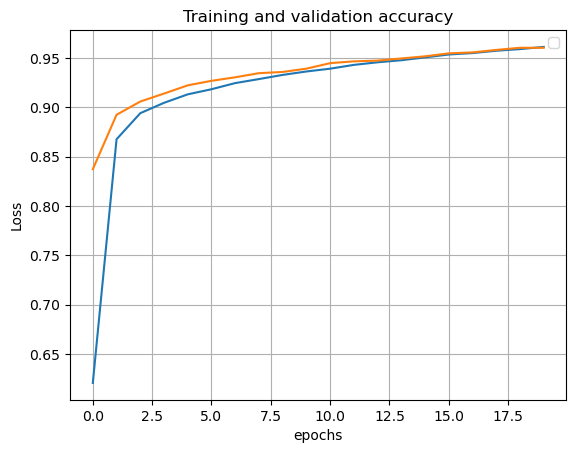

In [71]:
# plotting Training and validation accuracy

plt.plot(multiclass_classifier.history["accuracy"])
plt.plot(multiclass_classifier.history["val_accuracy"])
plt.title("Training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend("Train", "Validation")
plt.grid()
plt.show()

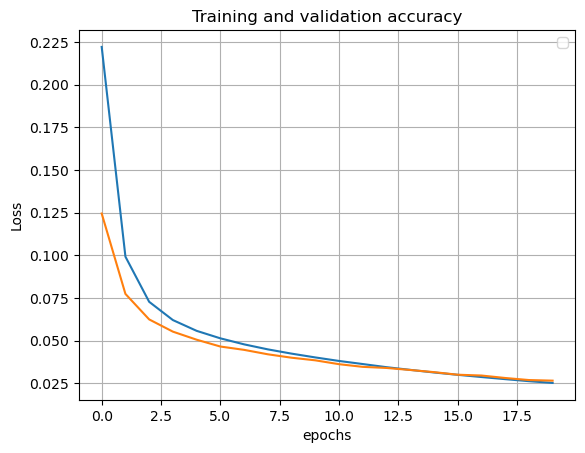

In [72]:
# plotting Training and validation loss

plt.plot(multiclass_classifier.history["loss"])
plt.plot(multiclass_classifier.history["val_loss"])
plt.title("Training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend("Train", "Validation")
plt.grid()
plt.show()

***Predictions using trained datasets***

In [75]:
y_test[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [76]:
y_pred = model.predict(X_test)
y_pred[:10]

313/313 [==============================] - 1s 2ms/step


array([[3.12642811e-07, 1.73420887e-08, 9.81839730e-06, 8.44926126e-06,
        2.78793544e-09, 1.46424043e-07, 2.42251202e-11, 9.99980152e-01,
        1.46597081e-08, 1.03666309e-06],
       [1.12379392e-04, 1.49690575e-04, 9.99520242e-01, 8.08942132e-05,
        1.92543492e-08, 1.73644185e-05, 1.17831121e-04, 1.02863149e-08,
        1.60544164e-06, 4.94198182e-10],
       [7.45420614e-10, 9.99958217e-01, 4.12859981e-06, 2.73646037e-06,
        4.97723306e-07, 6.12275790e-06, 4.43296221e-06, 1.89438924e-05,
        4.56132648e-06, 3.59462092e-07],
       [9.99992430e-01, 7.27446270e-10, 3.40698284e-06, 3.37010931e-07,
        5.66825653e-09, 2.43505696e-07, 2.77706363e-07, 1.78176276e-06,
        1.45615164e-08, 1.42191413e-06],
       [1.54109262e-06, 1.93486516e-09, 2.08596030e-05, 1.43353835e-08,
        9.99765873e-01, 2.82631322e-06, 5.72441195e-06, 4.64143923e-05,
        2.03934110e-06, 1.54809983e-04],
       [3.56200541e-10, 9.99864817e-01, 4.04971246e-07, 3.33858611e-06,
   

In [77]:
y_pred = np.array([np.argmax(pred) for pred in y_pred])

y_pred has probabilities of all the predicted values stored in it. Each dataset has all the 10 values and the value of highest probability is the number that is hand written. so we are using argmax to find the index of highest probability.

In [78]:
y_pred[:10], y_test[:10]

(array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9]),
 array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8))

If we comapre here prediction for 9 data points is same and for 1 is wrong. It has predicted wrongly at index no. 9. Instead of 5, it has predicted 6.

***Plotting Confusion Matrix and Classification Report***

A confusion matrix is a table that is often used to evaluate the performance of a classification model on a set of labeled data. It provides a detailed breakdown of the model's predictions, showing the number of true positive, true negative, false positive, and false negative instances. The confusion matrix is a valuable tool for understanding the strengths and weaknesses of a classification model.

Here are the key components of a confusion matrix:

***True Positive (TP):*** Instances where the model correctly predicts the positive class.

***True Negative (TN):*** Instances where the model correctly predicts the negative class.

***False Positive (FP):*** Instances where the model incorrectly predicts the positive class (Type I error).

***False Negative (FN):*** Instances where the model incorrectly predicts the negative class (Type II error).

In [79]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, auc, roc_curve
import seaborn as sns

In [80]:
# defining function

def plot_confusion_matrix (y_test, y_predict):
    cm = confusion_matrix(y_test, y_predict)
    labels = list(np.unique(y_test))

    # color map
    cmap = sns.light_palette("blue")
    
    # Plotting Confusion Matrix
    
    plt.figure(figsize=(12,12))
    sns.heatmap(cm, annot=cm, cmap=cmap, fmt=".3f", xticklabels = labels, yticklabels = labels)
    plt.xlabel("Predicted Values")
    plt.ylabel("Actual Values")
    plt.title("Confusion Matrix")
    plt.show()
    
    print()
    print("_"*100)
    print("Classificarion Report:\n", classification_report(y_test, y_predict))
    print("Accuracy Score:" +str(accuracy_score(y_test, y_predict)*100))

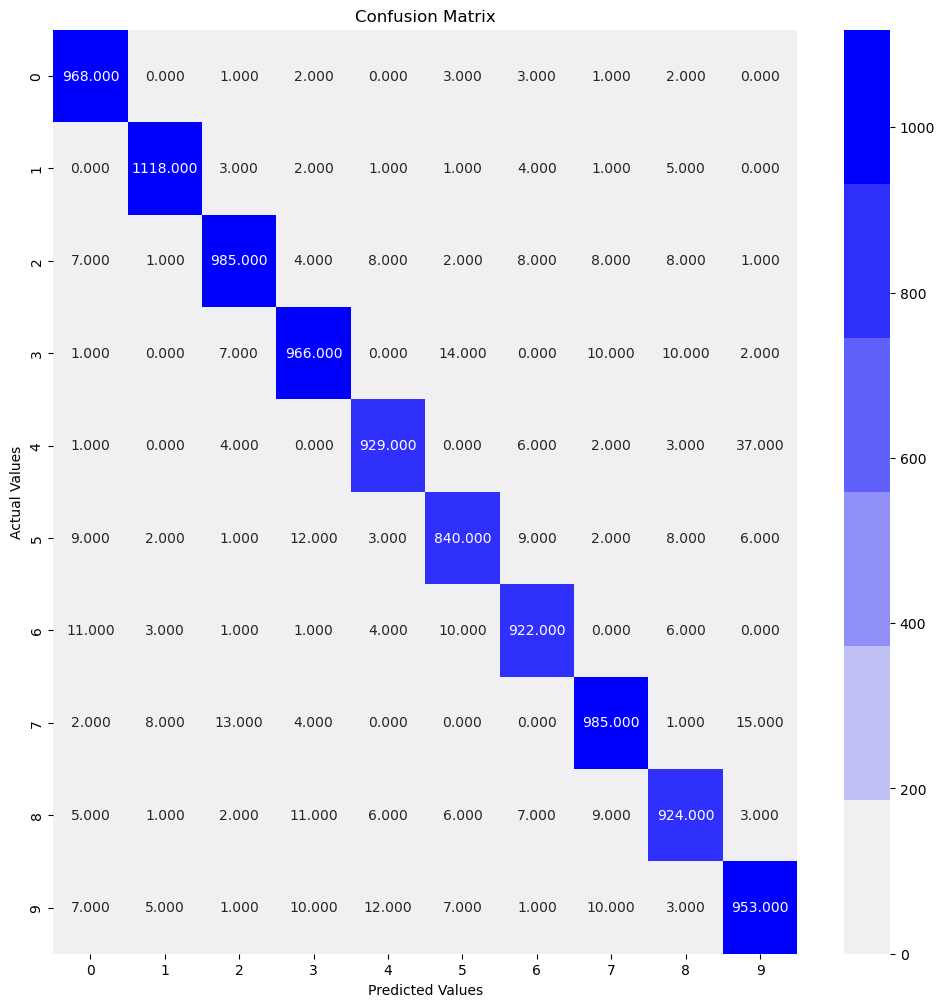


____________________________________________________________________________________________________
Classificarion Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.95      0.96      1032
           3       0.95      0.96      0.96      1010
           4       0.96      0.95      0.96       982
           5       0.95      0.94      0.95       892
           6       0.96      0.96      0.96       958
           7       0.96      0.96      0.96      1028
           8       0.95      0.95      0.95       974
           9       0.94      0.94      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

Accuracy Score:95.89999999999999


In [81]:
# Plotting confusion matrix
plot_confusion_matrix(y_test, y_pred)

***Precision = TP/(TP + FP)***

***Recall = TP/(TP + FN)***